In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
features = pd.read_csv('./Features data set.csv')
stores = pd.read_csv('./stores data-set.csv')
sales = pd.read_csv('./sales data-set.csv')

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [7]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [8]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [9]:
print('features dataset columns: ',features.columns)
print('stores dataset columns: ',stores.columns)
print('sales datset columns: ',sales.columns)

features dataset columns:  Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
stores dataset columns:  Index(['Store', 'Type', 'Size'], dtype='object')
sales datset columns:  Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [10]:
##Exploratory data analysis
##lets merge the data set to get better view

In [11]:
temp_df = features.merge(stores,left_on='Store',right_on='Store',how='left')
sales_df = temp_df.merge(sales[['Store', 'Dept', 'Date', 'Weekly_Sales']],left_on=['Store','Date'],right_on=['Store','Date'],how='left')
sales_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales'],
      dtype='object')

In [12]:
sales_df.Type.nunique()

3

In [13]:
sales_type = {'A':0,'B':1,'C':2}
sales_df.replace(sales_type,inplace=True)

In [14]:
sales_df.Type.unique()

array([0, 1, 2], dtype=int64)

In [15]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# insights of sales dataframe

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CA34C4198>,
      dtype=object)

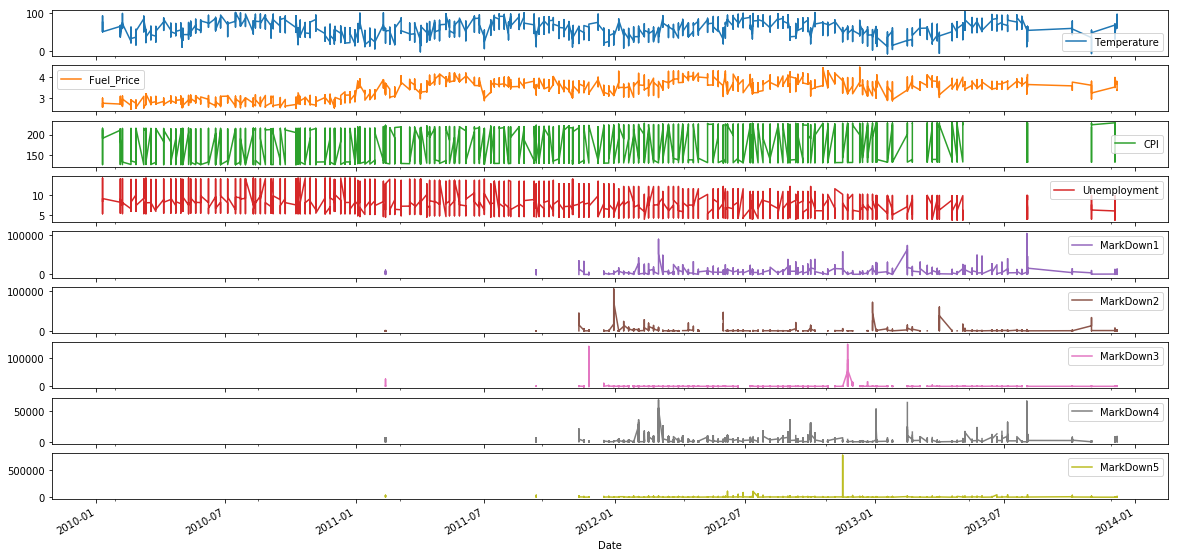

In [16]:
sales_df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date',subplots = True,figsize=(20,10))

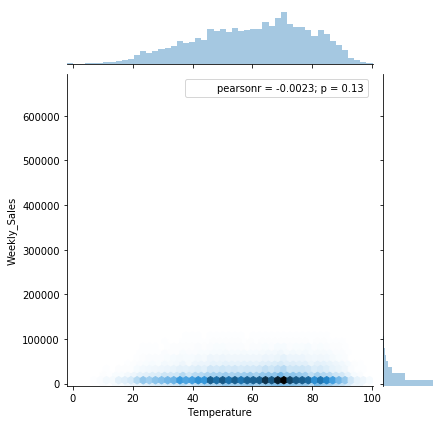

In [17]:
sns.jointplot('Temperature','Weekly_Sales',data=sales_df,kind='hex')

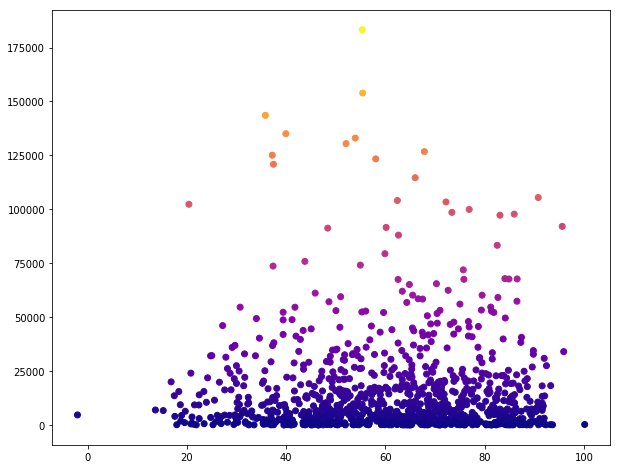

In [36]:
plt.figure(figsize=(10,8))
temp_df = sales_df.sample(1000)
plt.scatter(x=temp_df['Temperature'],y=temp_df['Weekly_Sales'],c=temp_df['Weekly_Sales'],cmap='plasma')

In [44]:
tempSales = sales_df.groupby(['Temperature']).Weekly_Sales.sum().reset_index()

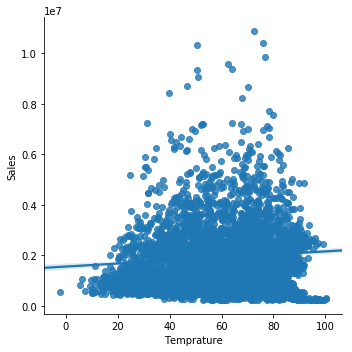

In [49]:
tempSales.columns = ['Temprature','Sales']
sns.lmplot('Temprature','Sales',data=tempSales)

from above graph we can see sales value is getting higher with increase in temprature
but sales is decreasing significantly after temprature around 90 .c

In [19]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423325 entries, 0 to 423324
Data columns (total 16 columns):
Store           423325 non-null int64
Date            423325 non-null datetime64[ns]
Temperature     423325 non-null float64
Fuel_Price      423325 non-null float64
MarkDown1       152433 non-null float64
MarkDown2       112532 non-null float64
MarkDown3       138658 non-null float64
MarkDown4       136466 non-null float64
MarkDown5       153187 non-null float64
CPI             422740 non-null float64
Unemployment    422740 non-null float64
IsHoliday       423325 non-null bool
Type            423325 non-null int64
Size            423325 non-null int64
Dept            421570 non-null float64
Weekly_Sales    421570 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(11), int64(3)
memory usage: 72.1 MB


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [22]:
predictors  = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Handling missing values

In [23]:
sales_df.dropna(subset=['Weekly_Sales'],axis=0,inplace=True)

In [24]:
##Need to replace all na values in markdown to 0
sales_df.MarkDown1.fillna(0,inplace=True)
sales_df.MarkDown2.fillna(0,inplace=True)
sales_df.MarkDown3.fillna(0,inplace=True)
sales_df.MarkDown4.fillna(0,inplace=True)
sales_df.MarkDown5.fillna(0,inplace=True)

In [25]:
sales_df.count()

Store           421570
Date            421570
Temperature     421570
Fuel_Price      421570
MarkDown1       421570
MarkDown2       421570
MarkDown3       421570
MarkDown4       421570
MarkDown5       421570
CPI             421570
Unemployment    421570
IsHoliday       421570
Type            421570
Size            421570
Dept            421570
Weekly_Sales    421570
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sales_df[predictors],sales['Weekly_Sales'])

In [27]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_predictions = model.predict(x_test)

In [28]:
error = y_test - y_predictions

In [29]:
featureImportance = pd.DataFrame(model.feature_importances_,index=x_train.columns)

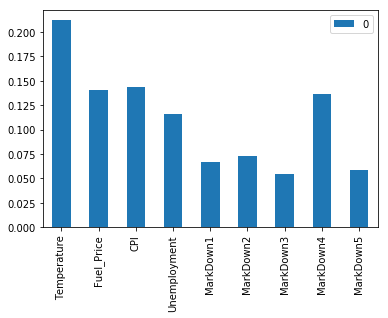

In [30]:
featureImportance.plot.bar()

In [31]:
from sklearn import metrics

In [32]:
print('mean absolute error: {}'.format(metrics.mean_absolute_error(y_test,y_predictions)))
print('mean squared error:  {}'.format(metrics.mean_squared_error(y_test,y_predictions)))
print('root mean square error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_predictions))))

mean absolute error: 4934.490881935351
mean squared error:  116382655.52466579
root mean square error: 10788.079325100729


In [33]:
print('no of error greater than 1000: {}'.format(error[error>1000].count()))

no of error greater than 1000: 28258


# plotting error

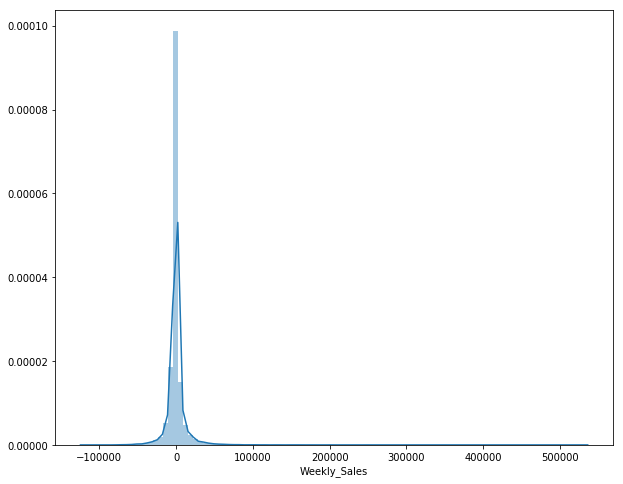

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(error,bins=100)

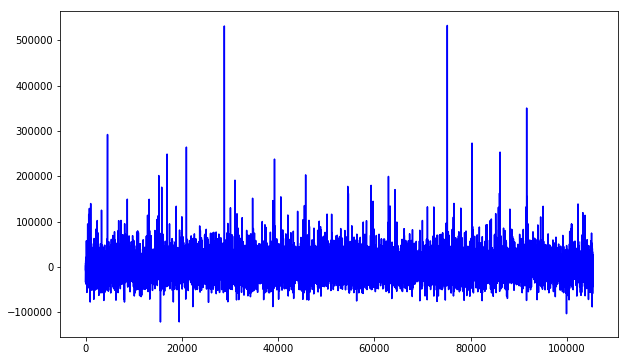

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(0,len(error)),error,c='b')